For this notebook you will need

+ numpy
+ matplotlib
+ scipy
+ scikit-learn

$$
\let\vaccent=\v % rename builtin command \v{} to \vaccent{}
\renewcommand{\v}[1]{{\mathbf{#1}}} % for vectors
\newcommand{\gv}[1]{{\mbox{\boldmath$ #1 $}}} 
\newcommand{\uv}[1]{{\mathbf{\hat{#1}}}} % for unit vector
\newcommand{\abs}[1]{\left| #1 \right|} % for absolute value
\newcommand{\avg}[1]{\left< #1 \right>} % for average
\let\underdot=\d % rename builtin command \d{} to \underdot{}
\renewcommand{\d}[2]{\frac{d #1}{d #2}} % for derivatives
\newcommand{\dd}[2]{\frac{d^2 #1}{d #2^2}} % for double derivatives
% \newcommand{\pd}[2]{\frac{\partial #1}{\partial #2}} 
% \renewcommand\eqref[1]{Eq.\;\ref{#1}} % new version of eqref
$$

In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Eigensystem calculations, optimization, and linear dynamical systems

### Finding eigenspectra is difficult for large matrices

Suppose we are given a square matrix $A \in \mathbb{R}^{N \times N}$. How can we find the eigenvalues and eigenvectors of this matrix numerically? The schoolyard method for performing this calculation consists of first solving the characteristic equation for the eigenvalues $\lambda$ such that
$$
\det(A - \lambda \mathbb I) = 0.
$$
In principle, this equation always factors into a polynomial with solutions corresponding to the eigenvalues $(\lambda - \lambda_1)(\lambda - \lambda_2)...(\lambda - \lambda_N) = 0$. However, as $N$ grows larger, it becomes progressively more difficult to factor the equation and find the roots $\lambda_i$, since the polynomial has order $\mathcal{O}(\lambda^N)$. At large $N$, it often becomes impractical to use numerical root-finding to solve the eigenvalue problem using schoolyard methods.

### The power method

The [power method](https://www.cs.huji.ac.il/w~csip/tirgul2.pdf) is a purely iterative method for finding the leading eigenvector of large matrices. The basic algorithm is as follows:

0. We start with a matrix $A \in \mathbb{R}^{N \times N}$.
1. Pick a random vector $\v{v} \in \mathbb{R}^{N}$, and convert it to a unit vector by scaling it with its own norm $\v{v} \leftarrow \v{v}/{||\v{v}||}$.
2. Compute the matrix product of our matrix $A$ with the random unit vector, and then update the vector $\v{v} \leftarrow A \v{v}$.
3. Re-normalize the resulting vector, producing a new unit vector, $\v{v} \leftarrow \v{v}/{||\v{v}||}$
4. Repeat steps 2 and 3 until the elements of the output unit vector fluctuate less than a pre-specified tolerance
5. Multiply the resulting vector by the original matrix $A$. The length of the resulting vector gives the magnitude of the leading eigenvalue

### The power method derivation

Suppose we seek to find the leading eigenvector of a matrix $A$. If the matrix $A$ is non-singular, then it has a full-rank eigenbasis $V \in \mathbb{R}^{n \times n}$, spanned by the $N$ independent, orthonormal eigenvectors $\uv{v}_i$ such that $\uv{v}_i \cdot \uv{v}_j = \delta_{ij}$. We start with a our random vector $\v{w}$, and write it in terms of the basis $V$,
$$
\v{w} = w_1 \uv{v}_1 + w_2 \uv{v}_2 + ... + w_N \uv{v}_N
$$
$$
A \v{w} = \lambda_1 w_1 \uv{v}_i + \lambda_2 w_2 \uv{v}_2 + ... + \lambda_N w_N \uv{v}_N
$$

We next compute the norm of the output vector

$$
A \v{w} \cdot  A \v{w} = \lambda_1^2 w_1^2 + \lambda_1^2 w_1^2 + ... + \lambda_1^N w_1^N
$$
for simplicity, we define $C \equiv \sqrt{\lambda_1^2 w_1^2 + \lambda_1^2 w_1^2 + ... + \lambda_1^N w_1^N}$. Rescaling our transformed vector by the norm, we apply the matrix $A$ again,
$$
A \cdot (A \cdot \v{w})/C = (1/C) (\lambda_1^2 w_1 \uv{v}_i + \lambda_2^2 w_2 \uv{v}_2 + ... + \lambda_N^2 w_N \uv{v}_N)
$$

This quantity has the norm,
$$
||A \cdot (A \cdot \v{w})/C||^2 = (1/C^2) (\lambda_1^4 w_1^2 \uv{v}_i + \lambda_2^4 w_2 \uv{v}_2 + ... + \lambda_N^4 w_N \uv{v}_N)
$$

Now we consider the limit as as $M \rightarrow \infty$. Without loss of generality, we assume that the $N$ eigenvalues of $A$ are ordered by their magnitude, $\abs{\lambda_1} > \abs{\lambda_2} > ... > \abs{\lambda_N}$. The series above diverges geometrically as we iterate repeatedly, such that

$$
A^M \v{w} \approx \dfrac{\lambda_1^M w_1 + ...}{\sqrt{\lambda_1^{2M} w_1^2 + ...}} \uv{v}_1 = \uv{v_1}
$$





## To Do

1. Implement the power method in Python. I've included my starter code below.
2. Sometimes you'll notice that the power method fails to converge to the correct solution. What is special about randomly-sampled matrices where this occurs? How does the direction of the starting vector affect the time it takes to reach a solution? 
2. Suppose that we interpret a given linear matrix $X$ as describing a discrete-time linear dynamical system, $\v{y}_{t+1} = X \v{y}_t$. What kind of dynamics does the power method exhibit? What about the pathological cases you discussed in the previous solution?
5. The power method represents a basic optimization problem, where we are searching for a convergent solution. We saw that our method occasionally fails to find the correct solution. One way to improve our optimization would be to add a momentum term of the form $$\v{y}_t \leftarrow \gamma \v{y}_{t - 1} + (1 - \gamma) \dfrac{X \v{y}_{t - 1}} {\abs{X \v{y}_{t - 1}}} $$. Where $\gamma \in (0, 1]$. How would you modify your implementation of the power method, in order to allow momentum? What kinds of pathological dynamics would the momentum term help us avoid?
6. Similar to the momentum term, there is also a way to add additional damping to the update rule. What kinds of dynamics would that help us avoid?

## Follow-up ideas and additional information

+ The runtime complexity of root-finding for a polynomial of the order, $N$ is poorly-defined as a function of $N$, because there are no guaranteed methods for high-order polynomials other than iterative root-finding. A [good guess](https://cs.stackexchange.com/questions/46920/bss-model-computational-complexity-of-finding-the-roots-of-a-polyomial) would be runtime $\mathcal{O}(N)$ with a large prefactor (for each of $N$ roots, perform a line search, discover a solution, and then reduce the polynomial in degree). However, because finding the initial determinant has runtime $\mathcal{O}(N^3)$, the overall runtime of this method is still unfavorable compared to iterative methods.
+ The power method gives us the leading eigenvalue and eigenvector of a matrix. What about the full eigenspectrum of the matrix? A more sophisticated version of the power method is the so-called [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm). Recall how, at each step, we renormalized our eigenvector estimate. If we instead propagate a bundle of random vectors (in order to estimate all of the different eigenvectors), the equivalent of renormalization would be repeated orthonormalization via a mechanism such as Gram-Schmidt. The QR algorithm basically performs this iterative re-orthonormalization very quickly via the QR factorization of the bundle.
+ We just described an iterative algorithm for finding eigenvalues, and we discussed one improvement via the addition of momentum term. It turns out there's lots of other ways to improve our update rule, such as by adjusted the eigenvector estimate at a rate proportional to the previous change (a gradient). Because gradient descent is used to train modern neural networks, there is a lot of research describing the convergence properties of various update rules; [here's a nice list of some common methods](https://ruder.io/optimizing-gradient-descent/index.html). If you want to further improve your power method implementation, try using some of these more modern rules instead.
+ We made an analogy between the iterative power method and the action of a linear dynamical system. For nonlinear dynamical systems, [an algorithm very similar to the power method](https://link.springer.com/article/10.1007/BF02128237) is used to calculate the [Lyapunov exponents](http://www.scholarpedia.org/article/Lyapunov_exponent), which quantify the degree of chaos present in the system. On some level, we can think of linear dynamical systems as linear dynamical systems where the elements of the matrix $A$ change with time and position.
+ Oftentimes in scientific computing we encounter rectangular matrices, $A \in \mathbb{R}^{N \times M}$, $M \neq N$. For these systems the eigenvectors are not defined, and the schoolyard polynomial equation for the eigenvalues will be overdetermined ($N > M$) or underdetermined ($N < M$). However, we can instead calculate the eigenspectrum of the square matrices $A^\dagger A$ or $A A^\dagger$, where the dagger indicates the conjugate transpose operation. We refer to the eigenvectors as the "right" or "left" singular vectors, respectively, and their associated eigenvalues are called the singular values. This concept results in the popular singular value decomposition for non-square matrices: $$ A = U \Sigma V^\dagger $$ where the columns of $U$ are the right singular vectors, the columns of $V$ are the left singular vectors, and $\Sigma$ is a square diagonal matrix with the eigenvalues along the diagonal. Since the eigenvalues and eigenvectors can be listed in any order, by convention we normally list the elements in descending order of eigenvalue magnitude.
+ Future work, which might be added to this assignment in a future iteration of the course: do a complexity scaling calculation comparing schoolyard and power method, to see which $N$ they crossover at.

In [4]:
import warnings
class SpectralDecompositionPowerMethod:
    """
    Store the output vector in the object attribute self.components_ and the 
    associated eigenvalue in the object attribute self.singular_values_ 
    
    Why this code structure and attribute names? We are using the convention used by 
    the popular scikit-learn machine learning library:
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

    Parameters
        max_iter (int): maximum number of iterations to for the calculation
        tolerance (float): fractional change in solution to stop iteration early
        gamma (float): momentum parameter for the power method
        random_state (int): random seed for reproducibility
        store_intermediate_results (bool): whether to store the intermediate results as
            the power method iterates
        stored_eigenvalues (list): If store_intermediate_results is active, a list of 
            eigenvalues at each iteration
        stored_eigenvectors (list): If store_intermediate_results is active, a list of
            eigenvectors at each iteration
    
    """
    def __init__(self, 
        max_iter=1000, 
        tolerance=1e-5, 
        gamma=0.0,
        random_state=None, 
        store_intermediate_results=False
    ):
    
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.gamma = gamma
        self.random_state = random_state
        self.store_intermediate_results = store_intermediate_results
        
    def fit(self, A):
        """
        Perform the power method with random initialization, and optionally store
        intermediate estimates of the eigenvalue and eigenvectors at each iteration.
        You can add an early stopping criterion based on the tolerance parameter.
        """
        ##########initiation####################################
        N = np.shape(A)[0]
        np.random.seed(self.random_state)
        v = np.random.rand(N)
        v = v/np.linalg.norm(v)
        ###########check for store_intermediate_results###########
        if self.store_intermediate_results:
            self.stored_eigenvalues = []
            self.stored_eigenvectors = []
        ##############perform iterations##########################
        for i in range(self.max_iter):
            v = self.gamma*v + (1-self.gamma)*np.matmul(A, v)
            if self.store_intermediate_results:
                self.stored_eigenvalues.append(np.linalg.norm(v))
            v = v/np.linalg.norm(v)
            if self.store_intermediate_results:
                self.stored_eigenvectors.append(v)
          
        self.components_ = v
        self.singular_values_ = np.linalg.norm(np.matmul(A, v))
        if self.stored_eigenvectors[-1][0]*self.stored_eigenvectors[-2][0] < 0:
            self.singular_values_ = -1*self.singular_values_
        ######The last step assigns the correct sign for the eigenvalue###############

**An Example of Non-Convergent Matrix**

>$$\gamma = 0.4$$

41.859059689440485
Power method solution: 3.511957483504599
Numpy solution: -2.1006454761946385


Text(0, 0.5, 'Power method eigenvector')

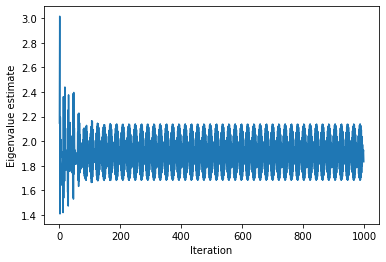

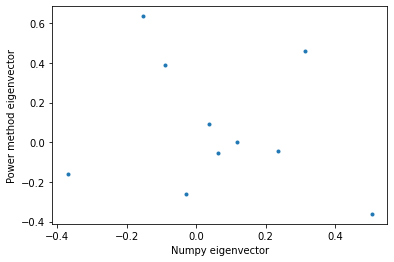

In [16]:


## Use the default eigensystem calculator in numpy as a point of comparison
def eigmax_numpy(A):
    """
    Compute the maximum eigenvalue and associated eigenvector in a matrix with Numpy.
    """
    eigsys = np.linalg.eig(A)
    ind = np.abs(eigsys[0]).argmax()
    return np.real(eigsys[0][ind]), np.real(eigsys[1][:, ind])


# np.random.seed(2) # for reproducibility
mm = np.random.random(size=(10, 10)) / 100
mm = np.random.normal(size=(10, 10))# / 100 # these matrices fail to converge more often

print(np.linalg.cond(mm.T))
model = SpectralDecompositionPowerMethod(gamma = 0.4, store_intermediate_results=True)
model.fit(mm);


print(f"Power method solution: {model.singular_values_}")
print(f"Numpy solution: {eigmax_numpy(mm)[0]}")

plt.figure()
plt.plot(model.stored_eigenvalues)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")

plt.figure()
plt.plot(eigmax_numpy(mm)[1], model.components_, '.')
plt.xlabel("Numpy eigenvector")
plt.ylabel("Power method eigenvector")

> The power method seems to not converge when the eigenvalues are complex conjugates, where there are multiple leading eigenvalues in terms of the modulus.

In [17]:
eigen_val = np.linalg.eig(mm)[0]
print([abs(i) for i in eigen_val])

[3.41754889339536, 3.41754889339536, 3.281863564675276, 3.281863564675276, 2.8114337429152654, 2.8114337429152654, 1.1996450716993128, 0.8661143171025215, 0.8661143171025215, 0.8970073239941909]


**An example of convergent matrix**

31.21123784262849
Power method solution: 3.9166377975363638
Numpy solution: 3.9166377975363567


Text(0, 0.5, 'Power method eigenvector')

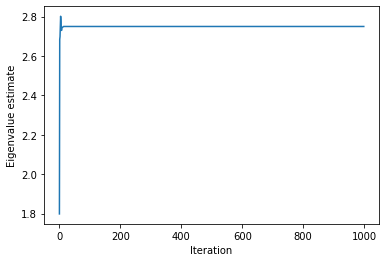

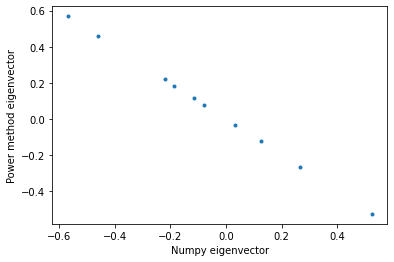

In [22]:

# np.random.seed(2) # for reproducibility
mm = np.random.random(size=(10, 10)) / 100
mm = np.random.normal(size=(10, 10))# / 100 # these matrices fail to converge more often

print(np.linalg.cond(mm.T))
model = SpectralDecompositionPowerMethod(gamma = 0.4, store_intermediate_results=True)
model.fit(mm);


print(f"Power method solution: {model.singular_values_}")
print(f"Numpy solution: {eigmax_numpy(mm)[0]}")

plt.figure()
plt.plot(model.stored_eigenvalues)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")

plt.figure()
plt.plot(eigmax_numpy(mm)[1], model.components_, '.')
plt.xlabel("Numpy eigenvector")
plt.ylabel("Power method eigenvector")

>Convergent behavior is seen when the leading eigenvalue is well separated from the rest

In [23]:
eigen_val = np.linalg.eig(mm)[0]
print([abs(i) for i in eigen_val])

[3.9166377975363567, 2.5902384309718727, 2.5902384309718727, 2.0261250196378504, 2.0261250196378504, 0.9934395093548736, 0.9934395093548736, 1.9906655873363919, 1.9906655873363919, 0.9493213318357797]


> The power method corresponds to finding fixed points of the matrix A, describing the dynamics. In pathalogical cases, we reach a periodic orbit.